**Topic:**        Challenge Set 3  
**Subject:**      Pandas (Exploring and visualizing our scraped movie data in pandas)  
**Date:**         01/21/2018  
**Name:**         Arina Igumenshcheva  
**Worked with:**  N/A  

In [248]:
# Import all the python library things!
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import datetime



In [9]:
# Import the movies data
filepath = 'https://raw.githubusercontent.com/thisismetis/nyc18_ds14/master/challenges/challenges_data/2013_movies.csv?token=ANE-v23X3Rft4hraAYczE5-ZgPgWdbtBks5abl3pwA%3D%3D'
movies_df = pd.read_csv(filepath,
        parse_dates =['ReleaseDate'])

movies_df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14


In [8]:
movies_df.dtypes

Title                  object
Budget                float64
DomesticTotalGross      int64
Director               object
Rating                 object
Runtime                 int64
ReleaseDate            object
dtype: object

### Challenge 1

Plot domestic total gross over time.

Text(0.5,1,'Domestic Total Gross Over Time')

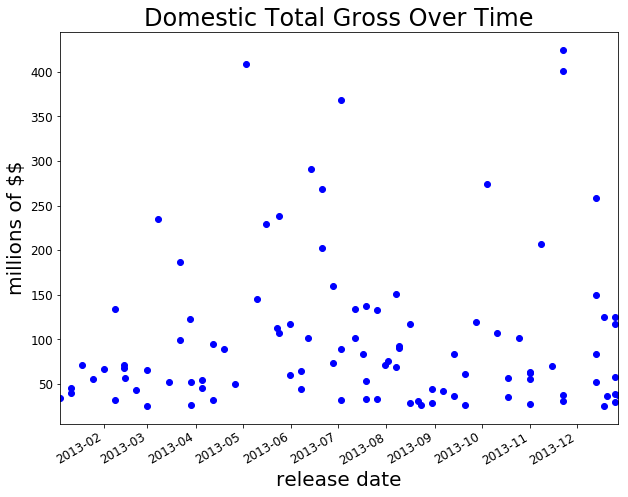

In [303]:
dtg_ts = pd.Series(list(movies_df.loc[:,'DomesticTotalGross']/1000000), index=movies_df.loc[:, 'ReleaseDate'])
plt.figure(figsize=(10,8))
plt.ylabel('millions of \$\$', fontsize=20)
dtg_ts.plot(style='bo', fontsize=12)
plt.xlabel('release date', fontsize=20)
plt.title('Domestic Total Gross Over Time', fontsize=24)

### Challenge 2

Plot runtime vs. domestic total gross.

Text(0.5,1,'Domestic Total Gross vs. Runtime')

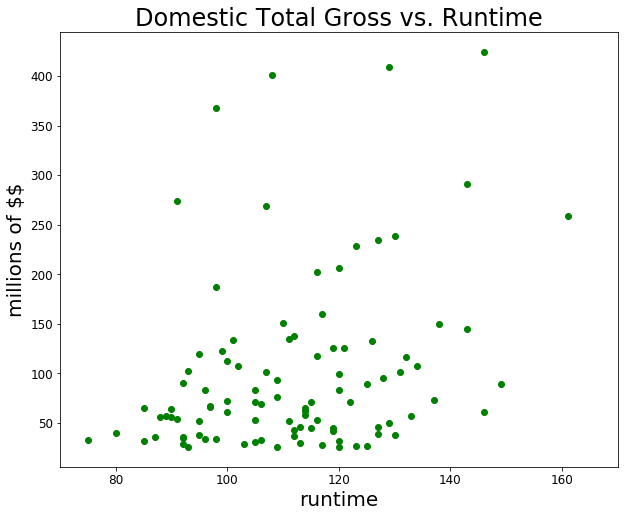

In [70]:
dtg_rt_s = pd.Series(list(movies_df.loc[:,'DomesticTotalGross']/1000000), index=movies_df.loc[:, 'Runtime'])
plt.figure(figsize=(10,8))
plt.ylabel('millions of \$\$', fontsize=20)
dtg_rt_s.plot(style='go', fontsize=12, xlim=(70, 170))
plt.xlabel('runtime', fontsize=20)
plt.title('Domestic Total Gross vs. Runtime', fontsize=24)

### Challenge 3

Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.

In [85]:
ratings_df = movies_df.loc[:, ['DomesticTotalGross', 'Runtime', 'Rating']]
ratings_df.groupby('Rating').mean()

,DomesticTotalGross,Runtime
Rating,,
G,2.684928e+08,107.000000
PG,1.311357e+08,99.933333
PG-13,1.114498e+08,117.510638
R,6.989243e+07,110.729730


### Challenge 4

Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross.

In [101]:
dtg_by_ratings_df = movies_df.loc[:, ['DomesticTotalGross', 'ReleaseDate', 'Rating']]

In [106]:
dtg_by_ratings_df =dtg_by_ratings_df.set_index('Rating')
dtg_by_ratings_df.head()

,DomesticTotalGross,ReleaseDate
Rating,,
PG-13,424668047,2013-11-22
PG-13,409013994,2013-05-03
PG,400738009,2013-11-22
PG,368061265,2013-07-03
PG-13,291045518,2013-06-14


In [110]:
unique_ratings = list(dtg_by_ratings_df.index.unique())
unique_ratings

['PG-13', 'PG', 'G', 'R']

In [132]:
dtg_by_ratings_df.loc['G', 'DomesticTotalGross']

268492764

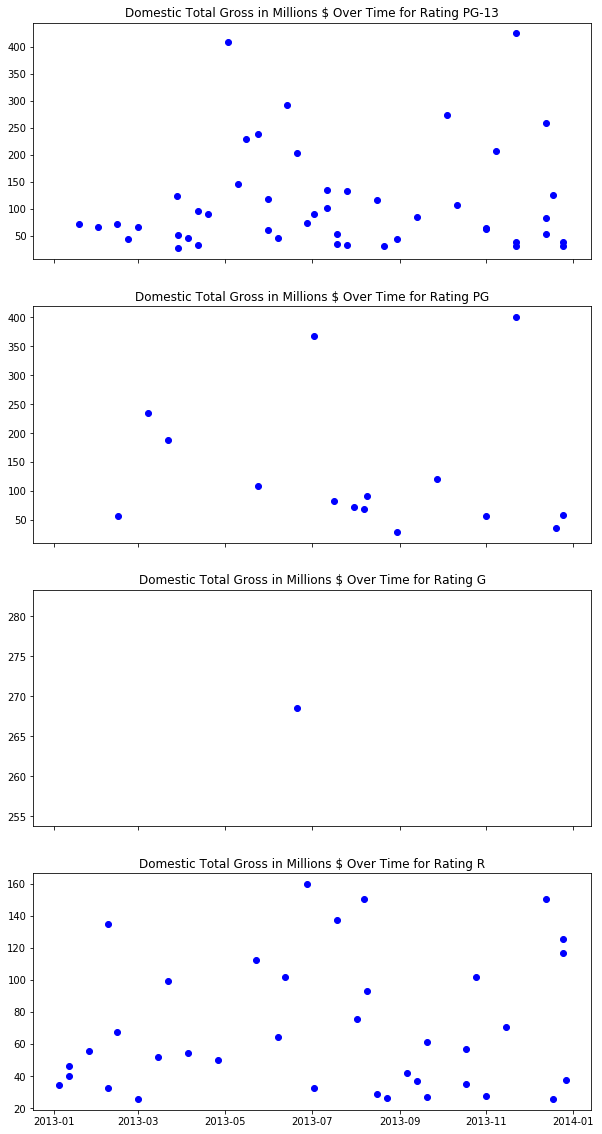

In [146]:
f, axarr = plt.subplots(len(unique_ratings), sharex=True, figsize=(10, 20))
for i in range(len(unique_ratings)):
    axarr[i].plot(dtg_by_ratings_df.loc[unique_ratings[i], 'ReleaseDate'],
                  dtg_by_ratings_df.loc[unique_ratings[i], 'DomesticTotalGross']/1000000, 'bo')
    axarr[i].set_title('Domestic Total Gross in Millions $ Over Time for Rating ' + unique_ratings[i])

### Challenge 5

What director in your dataset has the highest gross per movie?

In [168]:
unique_directors = list(movies_df.Director.dropna().unique())
unique_directors.sort()
unique_directors

# It looks like some Director entries contain two director names, 
# which could be a problem if those directors also showed up on 
# th list individually. They do not on this list, so leaving those
# names as they are for now.

['Adam McKay',
 'Alan Taylor',
 'Alfonso Cuaron',
 'Andres Muschietti',
 'Andrew Niccol',
 'Antoine Fuqua',
 'Baltasar Kormakur',
 'Barry CookNeil Nightingale',
 'Baz Luhrmann',
 'Ben Stiller',
 'Brad Anderson',
 'Brian Helgeland',
 'Bryan Singer',
 'Cal Brunker',
 'Carl Rinsch',
 'Chris BuckJennifer Lee',
 'Chris Wedge',
 'Dan Scanlon',
 'David O. Russell',
 'David Soren',
 'David Twohy',
 'Dean Parisot',
 'Denis Villeneuve',
 'Dennis Dugan',
 'Edgar Wright',
 'Evan GoldbergSeth Rogen',
 'Fede Alvarez',
 'Francis Lawrence',
 'Gavin Hood',
 'Gore Verbinski',
 'Guillermo del Toro',
 'Harald Zwart',
 'J.J. Abrams',
 'James DeMonaco',
 'James Mangold',
 'James Wan',
 'Jean-Marc Vallee',
 'Jeff Tremaine',
 'Jeff Wadlow',
 'Jimmy Hayward',
 'John Lee Hancock',
 'John Luessenhop',
 'John Moore',
 'John Wells',
 'Jon Chu',
 'Jon LucasScott Moore',
 'Jon Turteltaub',
 'Jonathan Levine',
 'Joseph Kosinski',
 'Justin Lin',
 'Ken Scott',
 'Kimberly Peirce',
 'Kirk De MiccoChris Sanders',
 'Klay H

In [171]:
dtg_by_dir_df = movies_df.loc[:, ['DomesticTotalGross', 'Director']]

In [178]:
# Using the mean domestic total gross as a measure of a director's highest total gross per movie
max_dtg_per_dir = dtg_by_dir_df.groupby('Director').mean()
max_dtg = max_dtg_per_dir.max()
dir_with_max_dtg = max_dtg_per_dir[max_dtg_per_dir.DomesticTotalGross == int(max_dtg)]
dir_with_max_dtg

,DomesticTotalGross
Director,
Francis Lawrence,424668047


### Challenge 6

Bin your dataset into months and make a bar graph of the mean domestic total gross by month. Error bars will represent the standard error of the mean.

Title of graph should include: Mean Domestic Total Gross by Month in 2013

Topic for consideration: what is the correct formula for the standard error of the mean? Examine the error bars and see if they are "reasonable."

In [287]:
dtg_ts_df = movies_df.loc[:, ['DomesticTotalGross', 'ReleaseDate']].copy()
dtg_ts_df.DomesticTotalGross = dtg_ts_df.DomesticTotalGross/1000000

In [288]:
df2 = dtg_ts_df.resample('M', on='ReleaseDate').mean().reset_index()

In [289]:
get_release_month = lambda dt: dt.strftime('%Y%m')

df2['ReleaseMonth'] = df2['ReleaseDate'].apply(get_release_month)
df2 = df2.set_index('ReleaseMonth')
df2 = df2.drop(['ReleaseDate'], axis=1)
df2 = df2.rename(columns={'DomesticTotalGross': 'DomesticTotalGrossAVG'})
df2.head()

,DomesticTotalGrossAVG
ReleaseMonth,
201301,49.543237
201302,67.386014
201303,96.097096
201304,60.940720
201305,177.409720


In [291]:
df3 = dtg_ts_df.resample('M', on='ReleaseDate').std().reset_index()
df3 = df3.rename(columns={'DomesticTotalGross': 'DomesticTotalGrossSTD'})

df3['ReleaseMonth'] = df3['ReleaseDate'].apply(get_release_month)
df3 = df3.set_index('ReleaseMonth')
df3 = df3.drop(['ReleaseDate'], axis=1)

df3.head()

,DomesticTotalGrossSTD
ReleaseMonth,
201301,14.659469
201302,32.831849
201303,73.239417
201304,25.301039
201305,111.775447


In [296]:
df4 = dtg_ts_df.resample('M', on='ReleaseDate').count()
df4 = df4.drop(['ReleaseDate'], axis=1)
df4 = df4.rename(columns={'DomesticTotalGross': 'Count'})
df4.head()

,Count
ReleaseDate,
2013-01-31,5
2013-02-28,7
2013-03-31,9
2013-04-30,6
2013-05-31,8


In [298]:
df4 = df4.reset_index()
df4['ReleaseMonth'] = df4['ReleaseDate'].apply(get_release_month)
df4 = df4.set_index('ReleaseMonth')
df4 = df4.drop(['ReleaseDate'], axis=1)

df5 = pd.merge(df3, df4, left_index=True, right_index=True)
df5.head()

,DomesticTotalGrossSTD,Count
ReleaseMonth,,
201301,14.659469,5
201302,32.831849,7
201303,73.239417,9
201304,25.301039,6
201305,111.775447,8


In [299]:
df5['DomesticTotalGrossSE'] = df5.apply (lambda row: row.DomesticTotalGrossSTD/np.sqrt(row.Count),axis=1)

In [300]:
df5.head()

,DomesticTotalGrossSTD,Count,DomesticTotalGrossSE
ReleaseMonth,,,
201301,14.659469,5,6.555914
201302,32.831849,7,12.409272
201303,73.239417,9,24.413139
201304,25.301039,6,10.329106
201305,111.775447,8,39.518588


Text(0.5,1,'Mean Domestic Total Gross by Month in 2013')

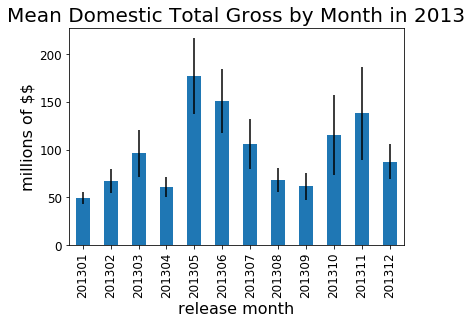

In [302]:
plt.figure(figsize=(10,20))
df2.plot(kind='bar', yerr=df5['DomesticTotalGrossSE'], fontsize=12, legend=False)
plt.xlabel('release month', fontsize=16)
plt.ylabel('millions of \$\$', fontsize=16)
plt.title('Mean Domestic Total Gross by Month in 2013', fontsize=20)